# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | lerwick
Processing Record 7 of Set 1 | haiku-pauwela
Processing Record 8 of Set 1 | queenstown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | wakkanai
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | nuku'alofa
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | nadym
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | nyala
Processing Record 19 of Set 1 | walvis bay
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | ytyk-kyuyel'
City not found. Skipping..

Processing Record 39 of Set 4 | anahuac
Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | laohekou
Processing Record 42 of Set 4 | hadithah
Processing Record 43 of Set 4 | ban dung
Processing Record 44 of Set 4 | manokwari
Processing Record 45 of Set 4 | empalme
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | utrik
Processing Record 48 of Set 4 | gaigeturi
Processing Record 49 of Set 4 | canton
Processing Record 0 of Set 5 | rebrikha
Processing Record 1 of Set 5 | ghanzi
Processing Record 2 of Set 5 | solnechnyy
Processing Record 3 of Set 5 | parang
Processing Record 4 of Set 5 | santa ana pacueco
Processing Record 5 of Set 5 | longmen
Processing Record 6 of Set 5 | pimentel
Processing Record 7 of Set 5 | hotan
Processing Record 8 of Set 5 | bouna
Processing Record 9 of Set 5 | aasiaat
Processing Record 10 of Set 5 | victoria point
Processing Record 11 of Set 5 | hermanus
Processing Record 12 of Set 5 | port douglas
Processing Record 13 o

Processing Record 30 of Set 8 | tobi village
City not found. Skipping...
Processing Record 31 of Set 8 | boende
Processing Record 32 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 33 of Set 8 | kachkanar
Processing Record 34 of Set 8 | upata
Processing Record 35 of Set 8 | namibe
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | balabac
Processing Record 39 of Set 8 | ghorawal
Processing Record 40 of Set 8 | kulia village
City not found. Skipping...
Processing Record 41 of Set 8 | clarence town
Processing Record 42 of Set 8 | colonia
Processing Record 43 of Set 8 | saint-philippe
Processing Record 44 of Set 8 | skagen
Processing Record 45 of Set 8 | kelibia
Processing Record 46 of Set 8 | santa ana
Processing Record 47 of Set 8 | saraipali
Processing Record 48 of Set 8 | valdivia
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 0 of Set 9 | mel'nikovo
Processing Rec

Processing Record 19 of Set 12 | singkil
Processing Record 20 of Set 12 | krasnyy chikoy
Processing Record 21 of Set 12 | kirensk
Processing Record 22 of Set 12 | masterton
Processing Record 23 of Set 12 | taro
Processing Record 24 of Set 12 | westport
Processing Record 25 of Set 12 | sanctuary point
Processing Record 26 of Set 12 | qapqal
City not found. Skipping...
Processing Record 27 of Set 12 | miches
Processing Record 28 of Set 12 | najaf
Processing Record 29 of Set 12 | amasra
Processing Record 30 of Set 12 | brookings
Processing Record 31 of Set 12 | sideropolis
Processing Record 32 of Set 12 | taikang
Processing Record 33 of Set 12 | kayangel
Processing Record 34 of Set 12 | laminusa
Processing Record 35 of Set 12 | maintirano
Processing Record 36 of Set 12 | tangalle
Processing Record 37 of Set 12 | tabou
Processing Record 38 of Set 12 | smithers
Processing Record 39 of Set 12 | katsuura
Processing Record 40 of Set 12 | mishan
Processing Record 41 of Set 12 | enniskillen
Proc

In [31]:
city_weather

{'coord': {'lon': -75.1103, 'lat': -15.2119},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 15.72,
  'feels_like': 15.12,
  'temp_min': 15.72,
  'temp_max': 15.72,
  'pressure': 1014,
  'humidity': 68,
  'sea_level': 1014,
  'grnd_level': 926},
 'visibility': 10000,
 'wind': {'speed': 4.55, 'deg': 144, 'gust': 4.56},
 'clouds': {'all': 91},
 'dt': 1689345648,
 'sys': {'country': 'PE', 'sunrise': 1689334031, 'sunset': 1689374697},
 'timezone': -18000,
 'id': 3935288,
 'name': 'Minas de Marcona',
 'cod': 200}

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

city_data_df["Date"]=(pd.to_datetime(city_data_df["Date"],unit='s')).dt.date
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0             east london -33.0153   27.9116     20.52        68           0   
1               taoudenni  22.6783   -3.9836     46.04         3           5   
2  hawaiian paradise park  19.5933 -154.9731     22.24        90         100   
3               papatowai -46.5619  169.4708     10.08        84          88   
4             nova sintra  14.8667  -24.7167     23.63        81          45   

   Wind Speed Country        Date  
0        1.54      ZA  2023-07-14  
1        9.74      ML  2023-07-14  
2        3.09      US  2023-07-14  
3        5.49      NZ  2023-07-14  
4        2.89      CV  2023-07-14

In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
0                   east london -33.0153   27.9116     20.52        68   
1                     taoudenni  22.6783   -3.9836     46.04         3   
2        hawaiian paradise park  19.5933 -154.9731     22.24        90   
3                     papatowai -46.5619  169.4708     10.08        84   
4                   nova sintra  14.8667  -24.7167     23.63        81   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                 0        1.54      ZA  2023-07-14  
1                 5        9.74      ML  2023-07-14  
2               100        3.09      US  2023-07-14  
3                88        5.49      NZ  2023-07-14  
4                45        2.89      CV  2023-07-14

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

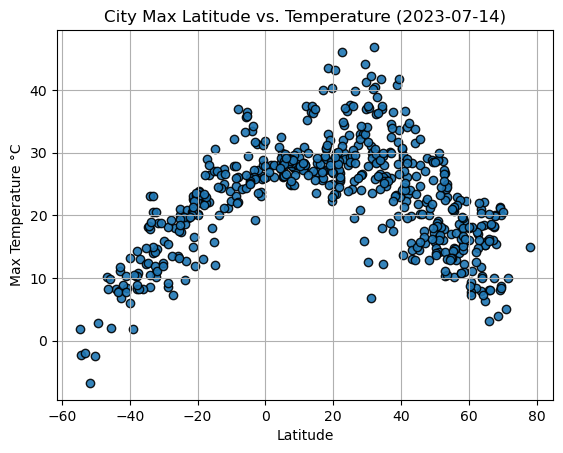

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.9, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Â°C")
date=city_data_df["Date"].min()
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

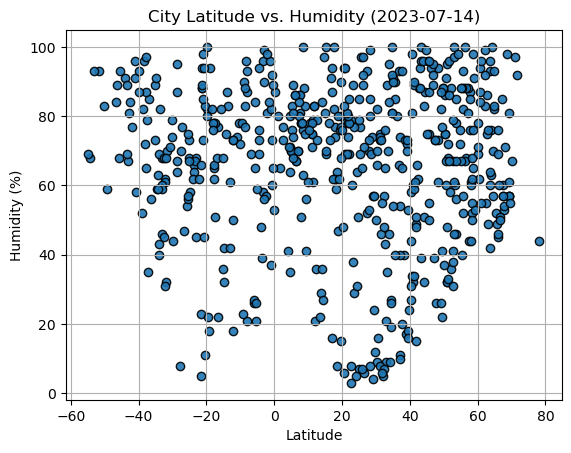

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.9, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

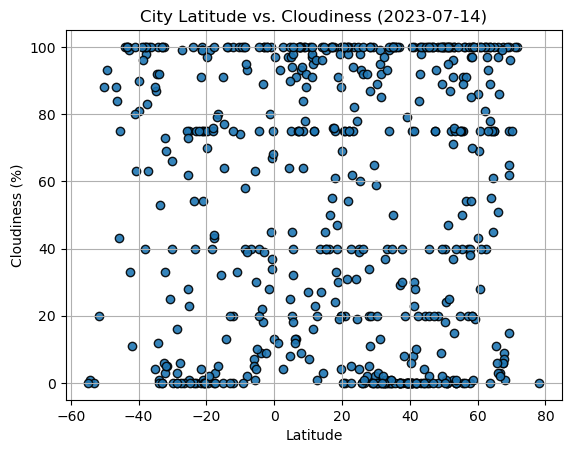

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.9, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

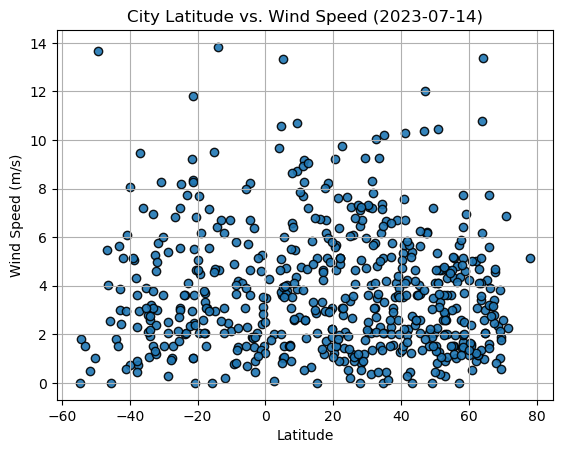

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.9, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

#equation of a line, y = mx + c
#line = f"y = (round(slope,2))x + (round(intercept,2))"

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
north_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
1                     taoudenni  22.6783   -3.9836     46.04         3   
2        hawaiian paradise park  19.5933 -154.9731     22.24        90   
4                   nova sintra  14.8667  -24.7167     23.63        81   
5                       lerwick  60.1545   -1.1494     16.00        78   
6                 haiku-pauwela  20.9219 -156.3051     23.36        79   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1                 5        9.74      ML  2023-07-14  
2               100        3.09      US  2023-07-14  
4                45        2.89      CV  2023-07-14  
5                43        4.22      GB  2023-07-14  
6                20        4.63      US  2023-07-14

In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
south_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0              east london -33.0153   27.9116     20.52        68           0   
3                papatowai -46.5619  169.4708     10.08        84          88   
7               queenstown -31.8976   26.8753     14.66        32          69   
8        port-aux-francais -49.3500   70.2167      2.78        59          93   
9                 tolanaro -25.0319   46.9987     20.04        68          75   

         Wind Speed Country        Date  
City_ID                                  
0              1.54      ZA  2023-07-14  
3              5.49      NZ  2023-07-14  
7              3.02      ZA  2023-07-14  
8             13.66      TF  2023-07-14  
9              3.09      MG  2023-07-14

###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6449646377712098


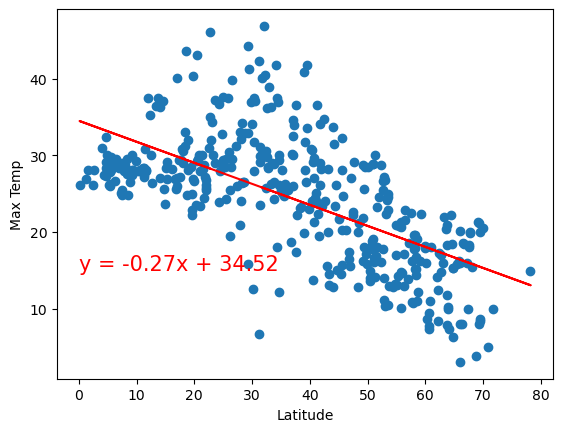

In [53]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line,(0,15),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

The r-value is 0.8702188667120985


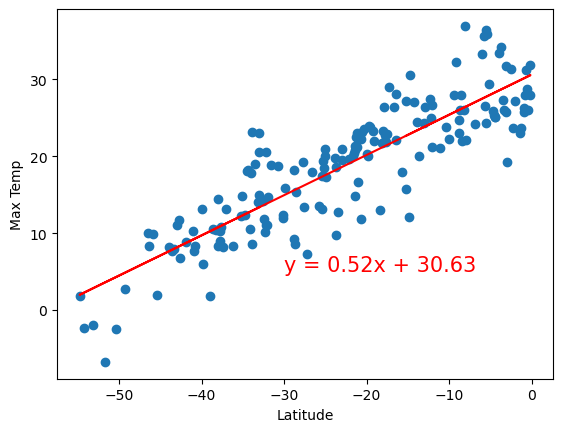

In [56]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line,(-30,5),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.023837034556547527


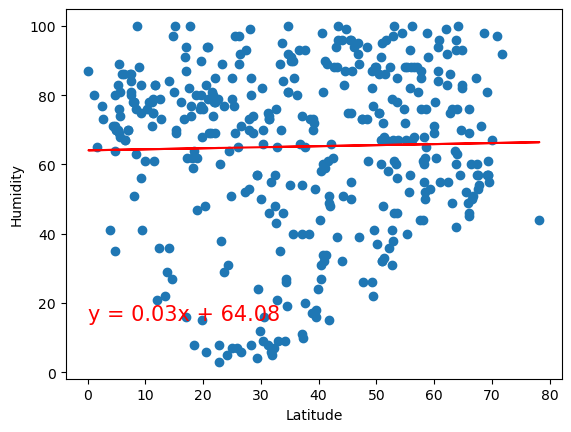

In [58]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line,(0,15),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

The r-value is -0.11464739577867093


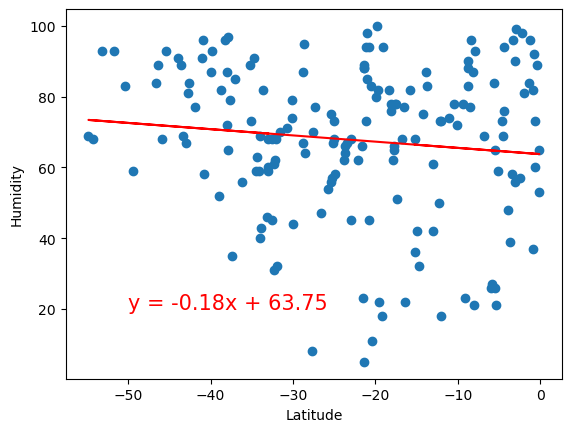

In [62]:
# Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line,(-50, 20),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.030039059163308176


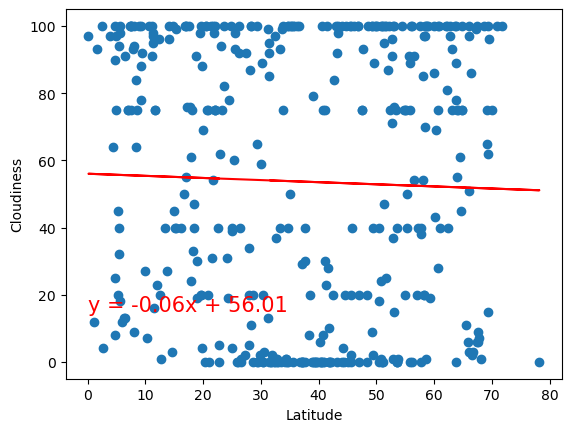

In [63]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line,(0,15),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

The r-value is -0.08541668961637702


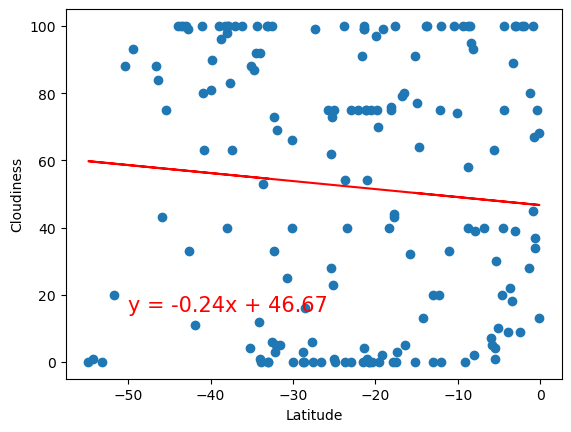

In [66]:
# Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line,(-50,15),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.14689308005685656


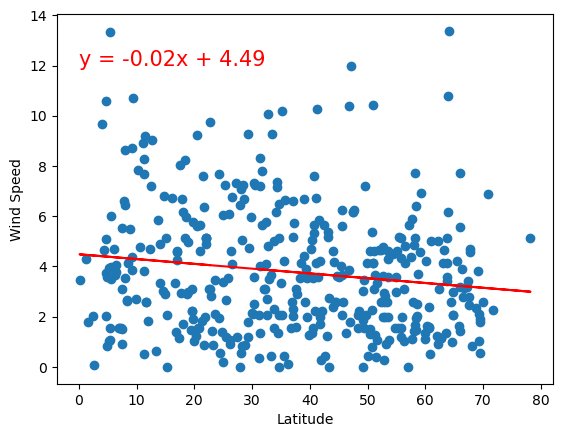

In [70]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line,(0,12),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

The r-value is 0.021634113557723187


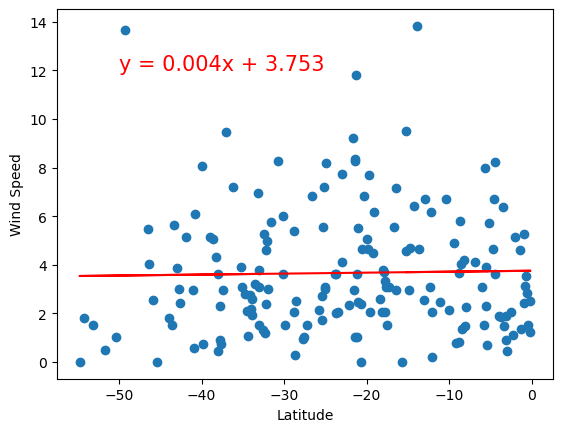

In [74]:
# Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,3)}x + {round(intercept,3)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line,(-50,12),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE